# End to end examples

## Boston with LightGBM

In [1]:
using Pkg; Pkg.activate("D:/JULIA/6_ML_with_Julia/EX-boston-lgbm"); Pkg.instantiate()

  Activating project at `D:\JULIA\6_ML_with_Julia\EX-boston-lgbm`
   Installed LightGBM ─ v0.5.2
    Building LightGBM → `C:\Users\jeffr\.julia\scratchspaces\44cfe95a-1eb2-52ea-b672-e2afdf69b78f\3ab6a0b9b0894dec750da06fede643e71cc6f7e8\build.log`
Precompiling project...
  ✓ LightGBM
  1 dependency successfully precompiled in 2 seconds (95 already precompiled)


### Getting started 
---

In [16]:
using MLJ
using PrettyPrinting
import DataFrames
import Statistics
using PyPlot
using StableRNGs

LGBMRegressor = @load LGBMRegressor

import LightGBM ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\jeffr\.julia\packages\MLJModels\tMgLW\src\loading.jl:168


LightGBM.MLJInterface.LGBMRegressor

Let us try LightGBM out by doing a regression task on the Boston house prices dataset. This is a commonly used dataset so there is a loader built into MLJ.

Here, the objective is to show how LightGBM can do better than a Linear Regressor with minimal effort.

We start out by taking a quick peek at the data itself and its statistical properties.

In [3]:
features, targets = @load_boston

((Crim = [0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829, 0.14455, 0.21124, 0.17004  …  0.2896, 0.26838, 0.23912, 0.17783, 0.22438, 0.06263, 0.04527, 0.06076, 0.10959, 0.04741], Zn = [18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Indus = [2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87  …  9.69, 9.69, 9.69, 9.69, 9.69, 11.93, 11.93, 11.93, 11.93, 11.93], NOx = [0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.524, 0.524  …  0.585, 0.585, 0.585, 0.585, 0.585, 0.573, 0.573, 0.573, 0.573, 0.573], Rm = [6.575, 6.421, 7.185, 6.998, 7.147, 6.43, 6.012, 6.172, 5.631, 6.004  …  5.39, 5.794, 6.019, 5.569, 6.027, 6.593, 6.12, 6.976, 6.794, 6.03], Age = [65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9  …  72.9, 70.6, 65.3, 73.5, 79.7, 69.1, 76.7, 91.0, 89.3, 80.8], Dis = [4.09, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9505, 6.0821, 6.5921  …  2.7986, 2.8927, 2.4091, 2.3999, 2.498

In [5]:
@show size(features)

size(features) = (506, 12)


(506, 12)

In [6]:
@show targets[1:3]

targets[1:3] = [24.0, 21.6, 34.7]


3-element Vector{Float64}:
 24.0
 21.6
 34.7

In [7]:
first(features, 3) |> pretty

┌────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┐
│ Crim       │ Zn         │ Indus      │ NOx        │ Rm         │ Age        │ Dis        │ Rad        │ Tax        │ PTRatio    │ Black      │ LStat      │
│ Float64    │ Float64    │ Float64    │ Float64    │ Float64    │ Float64    │ Float64    │ Float64    │ Float64    │ Float64    │ Float64    │ Float64    │
│ Continuous │ Continuous │ Continuous │ Continuous │ Continuous │ Continuous │ Continuous │ Continuous │ Continuous │ Continuous │ Continuous │ Continuous │
├────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┤
│ 0.00632    │ 18.0       │ 2.31       │ 0.538      │ 6.575      │ 65.2       │ 4.09       │ 1.0        │ 296.0      │ 15.3       │ 396.9      │ 4.98       │
│ 0.02731    │ 0.0        │ 7.07       │ 0.469      

We can also describe the dataframe

In [8]:
DataFrames.describe(features)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,Crim,3.61352,0.00632,0.25651,88.9762,0,Float64
2,Zn,11.3636,0.0,0.0,100.0,0,Float64
3,Indus,11.1368,0.46,9.69,27.74,0,Float64
4,NOx,0.554695,0.385,0.538,0.871,0,Float64
5,Rm,6.28463,3.561,6.2085,8.78,0,Float64
6,Age,68.5749,2.9,77.5,100.0,0,Float64
7,Dis,3.79504,1.1296,3.20745,12.1265,0,Float64
8,Rad,9.54941,1.0,5.0,24.0,0,Float64
9,Tax,408.237,187.0,330.0,711.0,0,Float64


Do the usual train/test partitioning. This is important so we can estimate generalisation.

In [9]:
train, test = partition(collect(eachindex(targets)), 0.70,shuffle = true, rng = StableRNG(52))

([52, 17, 330, 191, 265, 172, 19, 481, 94, 493  …  216, 120, 244, 26, 397, 170, 162, 67, 230, 154], [233, 385, 30, 91, 140, 335, 25, 358, 254, 226  …  419, 85, 487, 450, 506, 151, 246, 484, 93, 361])

Let us investigation some of the commonly tweaked LightGBM parameters. We start with looking at a learning curve for number of boostings.

In [17]:
lgb = LGBMRegressor() # initialised a model with default params
lgbm = machine(lgb, features[train, :], targets[train, 1])
boostrange = range(lgb, :num_iterations, lower = 2, upper = 500)
curve = learning_curve!(lgbm, 
                        resampling = CV(nfolds = 5),
                        range = boostrange, 
                        resolution = 100, 
                        measure = rms)

┌ Info: Training Machine{DeterministicTunedModel{Grid,…},…}.
└ @ MLJBase C:\Users\jeffr\.julia\packages\MLJBase\MuLnJ\src\machines.jl:464
┌ Info: Attempting to evaluate 100 models.
└ @ MLJTuning C:\Users\jeffr\.julia\packages\MLJTuning\Al9yX\src\tuned_models.jl:680
Evaluating over 100 metamodels: 100%[=========================] Time: 0:00:28


(parameter_name = "num_iterations",
 parameter_scale = :linear,
 parameter_values = [2, 7, 12, 17, 22, 27, 32, 37, 42, 47  …  455, 460, 465, 470, 475, 480, 485, 490, 495, 500],
 measurements = [8.242584831316137, 6.11905538837569, 5.047791526843733, 4.427475560655102, 4.111182831287945, 3.9560063468372926, 3.8731138614255687, 3.804157438995349, 3.756389872515972, 3.7166321065431367  …  3.3824386765406973, 3.382315512019174, 3.3811022926311045, 3.3825783832049376, 3.382853693118146, 3.383759920214521, 3.3829428872590004, 3.3834347538113936, 3.3836968624377475, 3.3831762302789827],)

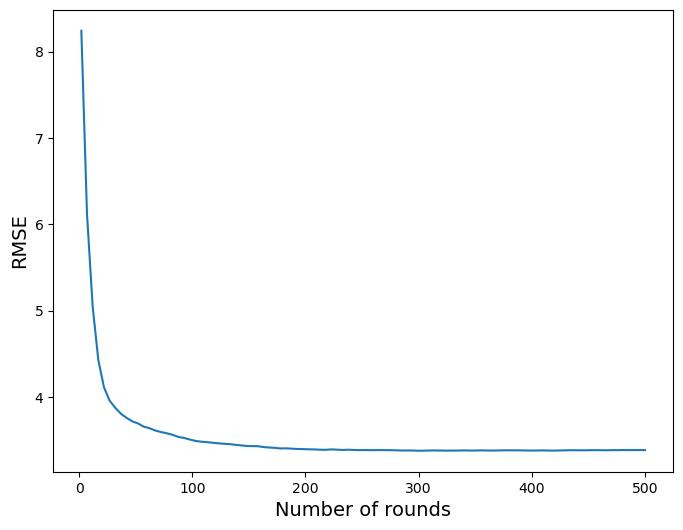

In [19]:
figure(figsize = (8, 6))
plot(curve.parameter_values, curve.measurements)
xlabel("Number of rounds", fontsize = 14)
ylabel("RMSE", fontsize = 14)
savefig("./plots/4.8.1.png")

It looks like that we don't need to go much past 100 boosts

Since LightGBM is a gradient based learning method, we also have a learning rate parameter which controls the size of gradient updates. Let us look at a learning curve for this parameter too

In [21]:
lgb = LGBMRegressor() # initialised a model with default params

lgbm= machine(lgb, features[train, :], targets[train, 1])
learning_range = range(lgb, :learning_rate, lower = 1e-3, upper = 1, scale = :log)
curve = learning_curve!(lgbm, 
                        resampling = CV(nfolds = 5),
                        range = learning_range, 
                        resolution = 100,
                        measure = rms)

┌ Info: Training Machine{DeterministicTunedModel{Grid,…},…}.
└ @ MLJBase C:\Users\jeffr\.julia\packages\MLJBase\MuLnJ\src\machines.jl:464
┌ Info: Attempting to evaluate 100 models.
└ @ MLJTuning C:\Users\jeffr\.julia\packages\MLJTuning\Al9yX\src\tuned_models.jl:680
Evaluating over 100 metamodels: 100%[=========================] Time: 0:00:02


(parameter_name = "learning_rate",
 parameter_scale = :log,
 parameter_values = [0.0010000000000000002, 0.001072267222010324, 0.001149756995397736, 0.001232846739442067, 0.0013219411484660293, 0.001417474162926806, 0.0015199110829529337, 0.0016297508346206449, 0.0017475284000076838, 0.0018738174228603848  …  0.533669923120631, 0.5722367659350217, 0.6135907273413174, 0.657933224657568, 0.7054802310718643, 0.7564633275546289, 0.8111308307896871, 0.8697490026177833, 0.9326033468832199, 1.0],
 measurements = [9.442600914891088, 9.437658294116533, 9.432350080091393, 9.426663709068736, 9.420572602809223, 9.41406769470996, 9.40708146464312, 9.399597192945267, 9.39160901884837, 9.383032318363856  …  3.8518162837729895, 3.809350856253712, 3.871527749397676, 3.9876158649199516, 3.9278333309837965, 3.96054951574336, 4.073642247386757, 4.154200844806569, 4.392526550005319, 4.29536804756547],)

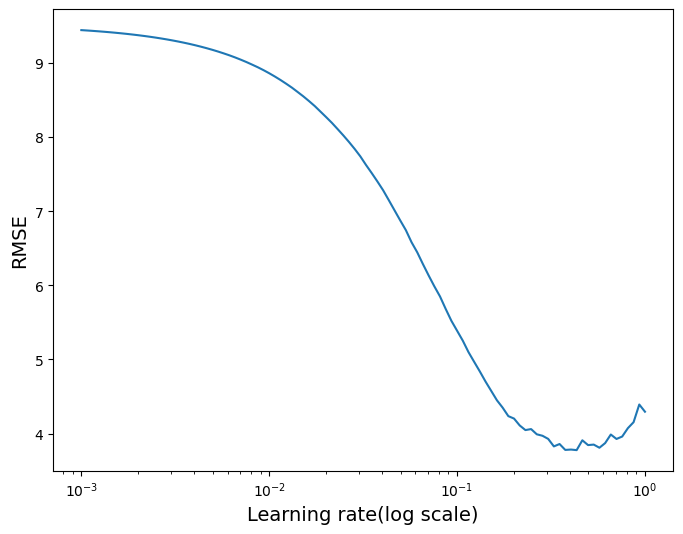

In [23]:
figure(figsize = (8, 6))
plot(curve.parameter_values, curve.measurements)
xscale("log")
xlabel("Learning rate(log scale)", fontsize = 14)
ylabel("RMSE", fontsize = 14)
savefig("./plots/4.8.2.png")

It seems like near 0.5 is a reasonable place. Bearing in mind that for lower values of learning rate we possibly require more boosting in order to converge, so the default value of 100 might not be sufficient for convergence. We leave this as an exercise to the reader. We can still try to tune this parameter, however.

Finally let us check number of datapoints required to produce a leaf in an individual tree. This parameter controls the complexity of individual learner trees, and too low a value might lead to overfitting.

In [24]:
lgb = LGBMRegressor() # initialised a model with default params

LGBMRegressor(
    boosting = "gbdt",
    num_iterations = 10,
    learning_rate = 0.1,
    num_leaves = 31,
    max_depth = -1,
    tree_learner = "serial",
    histogram_pool_size = -1.0,
    min_data_in_leaf = 20,
    min_sum_hessian_in_leaf = 0.001,
    max_delta_step = 0.0,
    lambda_l1 = 0.0,
    lambda_l2 = 0.0,
    min_gain_to_split = 0.0,
    feature_fraction = 1.0,
    feature_fraction_bynode = 1.0,
    feature_fraction_seed = 2,
    bagging_fraction = 1.0,
    bagging_freq = 0,
    bagging_seed = 3,
    early_stopping_round = 0,
    extra_trees = false,
    extra_seed = 6,
    max_bin = 255,
    bin_construct_sample_cnt = 200000,
    init_score = "",
    drop_rate = 0.1,
    max_drop = 50,
    skip_drop = 0.5,
    xgboost_dart_mode = false,
    uniform_drop = false,
    drop_seed = 4,
    top_rate = 0.2,
    other_rate = 0.1,
    min_data_per_group = 100,
    max_cat_threshold = 32,
    cat_l2 = 10.0,
    cat_smooth = 10.0,
    objective = "regression",
    categorical_feat

In [26]:
lgbm = machine(lgb, features[train, :], targets[train, 1])

Machine{LGBMRegressor,…} trained 0 times; caches data
  model: LightGBM.MLJInterface.LGBMRegressor
  args: 
    1:	Source @864 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @955 ⏎ `AbstractVector{Continuous}`


dataset is small enough and the lower and upper sets the tree to have certain number of leaves

In [28]:
leaf_range = range(lgb, :min_data_in_leaf, lower = 1, upper = 50)

curve = learning_curve!(lgbm, 
                        resampling=CV(nfolds = 5),
                        range = leaf_range, 
                        resolution = 50, 
                        measure = rms)

┌ Info: Training Machine{DeterministicTunedModel{Grid,…},…}.
└ @ MLJBase C:\Users\jeffr\.julia\packages\MLJBase\MuLnJ\src\machines.jl:464
┌ Info: Attempting to evaluate 50 models.
└ @ MLJTuning C:\Users\jeffr\.julia\packages\MLJTuning\Al9yX\src\tuned_models.jl:680
Evaluating over 50 metamodels: 100%[=========================] Time: 0:00:01


(parameter_name = "min_data_in_leaf",
 parameter_scale = :linear,
 parameter_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
 measurements = [5.046397182749027, 4.894906775016428, 5.036494961076708, 4.91722565066497, 4.965231353911535, 4.91988133069174, 4.989963717159022, 5.045542111490891, 5.063992355795521, 5.164420810710274  …  5.795483619318088, 5.845329781439866, 5.860645094702287, 5.89061089135083, 5.945250635474689, 5.951491159558157, 6.0104727398558575, 6.035821243109054, 6.0325028816031745, 6.080498920104094],)

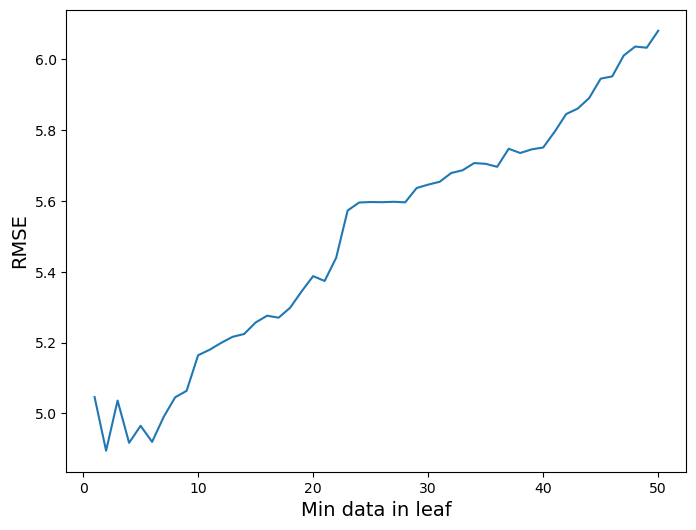

In [30]:
figure(figsize=(8,6))
plot(curve.parameter_values, curve.measurements)
xlabel("Min data in leaf", fontsize = 14)
ylabel("RMSE", fontsize = 14)
savefig("./plots/4.8.3.png")

It does not seem like there is a huge risk for overfitting, and lower is better for this parameter.

Using the learning curves above we can select some small-ish ranges to jointly search for the best combinations of these prameters via cross validation.

In [31]:
r1 = range(lgb, :num_iterations, lower = 50, upper = 100)
r2 = range(lgb, :min_data_in_leaf, lower = 2, upper = 10)
r3 = range(lgb, :learning_rate, lower = 1e-1, upper = 1e0)
tm = TunedModel(model=lgb,
                tuning = Grid(resolution=5),
                resampling=CV(rng = StableRNG(123)),
                ranges = [r1, r2, r3],
                measures = rms)
mtm = machine(tm, features, targets)
fit!(mtm, rows = train);


┌ Info: Training Machine{DeterministicTunedModel{Grid,…},…}.
└ @ MLJBase C:\Users\jeffr\.julia\packages\MLJBase\MuLnJ\src\machines.jl:464
┌ Info: Attempting to evaluate 125 models.
└ @ MLJTuning C:\Users\jeffr\.julia\packages\MLJTuning\Al9yX\src\tuned_models.jl:680
Evaluating over 125 metamodels: 100%[=========================] Time: 0:00:23


Let's see what the cross validation best model parameters turned out to be?

In [32]:
best_model = fitted_params(mtm).best_model
@show best_model.learning_rate
@show best_model.min_data_in_leaf
@show best_model.num_iterations

best_model.learning_rate = 0.325
best_model.min_data_in_leaf = 8
best_model.num_iterations = 100


100

Great, and now let's predict using the held out data.

In [33]:
predictions = MLJ.predict(mtm, rows = test)
rms_score = round(rms(predictions, targets[test, 1]), sigdigits = 4)

@show rms_score

rms_score = 3.669


3.669